<img src="logo.jpg" />

## [Pedram Jahangiry](https://github.com/PJalgotrader) 

# Support Vector Machines (SVM) 

* SVM can be used for regression and classification. 
* SVM supports both linear and non linear models. 
* In SVM the goal is to make sure that the errors don't exceed a threshold.


## Classification

Importing the packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


## Data preprocessing 

In [7]:
df.isna().sum()  

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop('User ID',axis=1, inplace=True)

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [11]:
df = df[['Purchased','Age', 'EstimatedSalary', 'Gender_Male']]

In [12]:
df.head()

,Purchased,Age,EstimatedSalary,Gender_Male
0,0,19,19000,1
1,0,35,20000,1
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,1


## Data visualization 

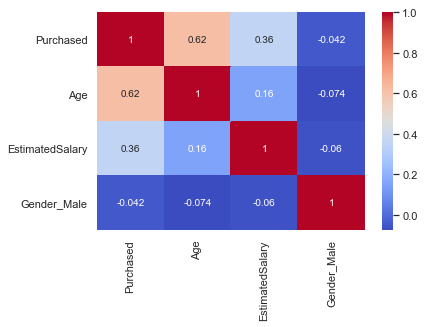

In [13]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


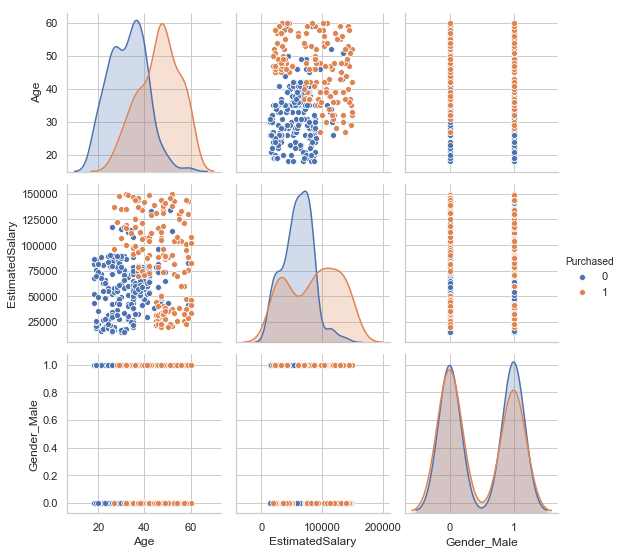

In [14]:
sns.set_style('whitegrid')
sns.pairplot(df, hue= 'Purchased')

### Defining the variables and splitting the data

In [15]:
y = df['Purchased']
X = df.drop('Purchased', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [16]:
X_train.head()

,Age,EstimatedSalary,Gender_Male
269,40,61000,1
389,48,35000,0
232,40,107000,1
89,35,50000,1
236,40,57000,1


## Scaling the features: 

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test) 

In [18]:
X_train_sc[0:2,:]

array([[ 0.24760376, -0.27423041,  1.01892912],
       [ 1.00491036, -1.04089609, -0.98142253]])

###  SVM Classification with Sklearn

In [19]:
from sklearn.svm import SVC

In [20]:
# Fitting SVM classifier to the Training set

SVM_classification = SVC(random_state = rand_state)
SVM_classification.fit(X_train_sc, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1000, shrinking=True,
    tol=0.001, verbose=False)

### What are the parameters in general?

* **C** represents the budget for your misclassification on the training data. A small c value gives you low bias but high variance. Low bias because you restrict the misclassification a lot. 

**IMPORTANT NOTE: in scikit learn, the interpretation of C is completely reversed compared to ISLR!!** C stands for **Cost**. A large C in sklearn set up means that you are penalizing the errors more restricly so the margin will be narrower ie overfitting (small bias, big variance)
https://scikit-learn.org/stable/modules/svm.html


* **gamma** is the free prameter of the radial basis function (rbf). Intuitively, the gamma parameter defines **how far** the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors. 

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [21]:
# Predicting the Test set results
y_pred_test = SVM_classification.predict(X_test_sc)

### the Confusion Matrix 

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
print(confusion_matrix(y_test, y_pred_test))

[[45  3]
 [ 4 28]]


In [24]:
# defining our own confusion matrix function
from sklearn.metrics import confusion_matrix
def my_confusion_matrix(y, y_hat):
    cm = confusion_matrix(y, y_hat)
    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    accuracy = round((TP+TN) / (TP+ FP+ FN+ TN) ,2)
    precision = round( TP / (TP+FP),2)
    recall = round( TP / (TP+FN),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : 0 ','Actual : 1'], columns=['Predict : 0','Predict :1 '])
    print('\n')
    print('Accuracy = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall = {}'.format(recall))
    print("-----------------------------------------")
    return cm_labled
 

In [25]:
my_confusion_matrix(y_test,y_pred_test)



Accuracy = 0.91
Precision = 0.9
Recall = 0.88
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,45,3
Actual : 1,4,28


###  Cross validation

Now let's try to get an estimate for the accuracy of our model using cross validation technique. 

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
SVM_classification = SVC(random_state = rand_state, gamma='scale')
accuracy = cross_val_score(estimator = SVM_classification, X = X_train_sc, y = y_train, cv = 10 , scoring="accuracy" )
# We are estimating y_test because y_test is not observable in the Titanic data set. 
# Cross validation does the estimating. 

In [28]:
accuracy

array([0.9375 , 0.90625, 0.9375 , 0.875  , 0.9375 , 0.90625, 0.875  ,
       0.90625, 0.875  , 0.90625])

In [29]:
round(accuracy.mean(),3)

0.906

In [30]:
round(accuracy.std(),3)

0.024

# Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [31]:
param_grid = {'C': [0.1,1, 10, 100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear']} 

In [32]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [41]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=5, n_jobs = None)
# when refit = True, then after the grid search has taken place, it will use the optimized parameters

In [42]:
# May take awhile!
%time grid.fit(X_train_sc,y_train)

Wall time: 2.09 s


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting. 

We tend to do all this mannually in KNN. Remember?

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [35]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [36]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Then you can re-run predictions on this grid object just like you would with a normal model.

In [43]:
SVM_final = SVC(C=10, kernel='rbf', gamma=1, random_state=rand_state) # We found optimized parameters via cross validation
y_pred_test_optimized = SVM_final.fit(X_train_sc,y_train).predict(X_test_sc)
y_pred_test_optimized

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [44]:
my_confusion_matrix(y_test, y_pred_test_optimized)



Accuracy = 0.9
Precision = 0.88
Recall = 0.88
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,44,4
Actual : 1,4,28


or alternatively you can use the **grid.predict** directly:

In [45]:
grid_predictions = grid.predict(X_test_sc)

In [46]:
my_confusion_matrix(y_test,grid_predictions)



Accuracy = 0.9
Precision = 0.88
Recall = 0.88
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,44,4
Actual : 1,4,28


---
### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

In [47]:
X= df[['Age', 'EstimatedSalary']]
y= df[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

## Fitting SVM classifier to the Training set

In [67]:
# Increasing the C overfits the model
SVM_classification = SVC(C=1, random_state = rand_state, gamma=1)
SVM_classification.fit(X_train, y_train.values.reshape(-1,))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=1000, shrinking=True, tol=0.001,
    verbose=False)

In [68]:
# Predicting the Test set results
y_pred = SVM_classification.predict(X_test)

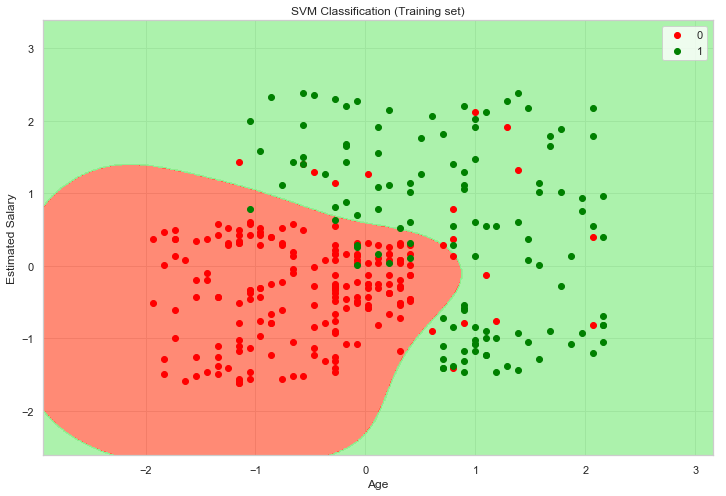

In [69]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , SVM_classification.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

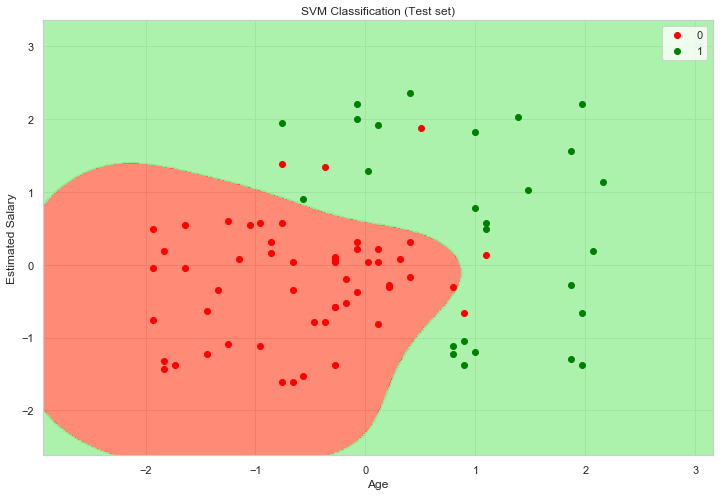

In [70]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, SVM_classification.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [71]:
print(confusion_matrix(y_test, y_pred))

[[49  5]
 [ 0 26]]


In [72]:
# Accuracy: what percentage of the total dots did we predict correctly?
# precision: among the ones that we predicted green (positive), how many are actually green (incorporating FP: type I error)
# recall: how many of the Green dots (True positives) we predicted correctly (incorporating FN: type II error)
my_confusion_matrix(y_test,y_pred)



Accuracy = 0.94
Precision = 0.84
Recall = 1.0
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,49,5
Actual : 1,0,26


---

**Exercise 1**: Try c=1000. What do you expect to see?

**Exercise 2**: Try gamma =100. What do you expect to see?

**Exercise 3**: Try to visualize the linear linear Kernel for the test set.

In [55]:
SVM_linear = SVC(random_state = rand_state, kernel='linear')
SVM_linear.fit(X_train, y_train.values.reshape(-1,))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1000, shrinking=True,
    tol=0.001, verbose=False)

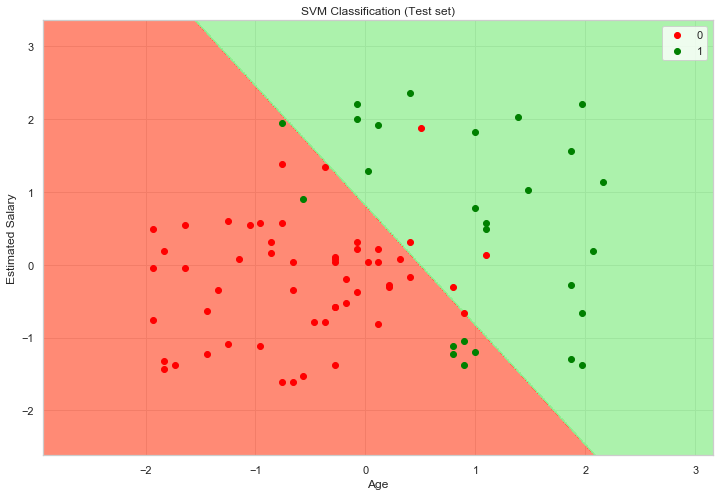

In [56]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, SVM_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Exercisse 4**: Generate the confusion matrix for your SVM using linear kernel

In [73]:
# first, find the new predictions using linear kernel:
y_pred_test_linear = SVM_linear.predict(X_test)

In [74]:
# no use your my_confusion_matrix function
my_confusion_matrix(y_test,y_pred_test_linear)



Accuracy = 0.86
Precision = 0.83
Recall = 0.73
-----------------------------------------


,Predict : 0,Predict :1
Actual : 0,50,4
Actual : 1,7,19


---

###  Additional links:

1. Convex Optimization : https://www.amazon.com/dp/0521833787/?coliid=I1FTQ8R03FUUQK&colid=VIHSBPX6N52B&psc=1&ref_=lv_ov_lig_dp_it
2. SKlearn documentation : https://scikit-learn.org/stable/modules/svm.html
3. Performance measures (1): https://en.wikipedia.org/wiki/Confusion_matrix
4. Performance measures (2): https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/ 
5. ROC curve: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html